In [98]:
import numpy as np
import matplotlib.pyplot as plt
from fbg import FBGSegment, FBG
from sklearn.model_selection import train_test_split
%matplotlib inline

In [99]:
class Item:
    def __init__(self, minv, maxv):
        self.min = minv
        self.max = maxv

In [109]:
lRange = Item(1000, 2000)  # increasing l would introduce oscillations
dnRange = Item(0.0004, 0.001)
n0Range = Item(1.4415, 1.4415)
netaRange = Item(0.75, 0.95)
pitchRange = Item(0.535, 0.5365)
xRange = Item(1.54, 1.55)
nSamples = 300
nVariables = 5

In [110]:
# lRange = Item(500, 3000)  # increasing l would introduce oscillations
# dnRange = Item(9e-4, 1e-3)
# n0Range = Item(1.47, 1.49)
# netaRange = Item(0.75, 0.95)
# pitchRange = Item(0.510135135, 0.515891892)
# xRange = Item(1.5, 1.54)
# xMaxRange = Item(1.51, 1.53)
# nSamples = 300
# nVariables = 5

In [111]:
def generateData(size=100):
    y = []
    
    x = np.random.rand(size, nVariables)
    for sample in x:
        l = lRange.min + sample[0]*(lRange.max-lRange.min)
        dn = dnRange.min + sample[1]*(dnRange.max-dnRange.min)
        n0 = n0Range.min + sample[2]*(n0Range.max - n0Range.min)
        neta = netaRange.min + sample[3]*(netaRange.max - netaRange.min)
        pitch = pitchRange.min + sample[4]*(pitchRange.max - pitchRange.min)
        
        _fbg = FBG(nSamples)
        _fbg.push(l=l, pitch=pitch, dn=dn, n0=n0, neta=neta)
        
        y.append(_fbg.getFunctionSamples(xRange.min, xRange.max)[1])
    
    return x, np.array(y)

In [119]:
%%time
x, y = generateData(300000)

CPU times: user 58min 32s, sys: 44.3 s, total: 59min 16s
Wall time: 58min 19s


In [120]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
data = dict()
data["xTrain"] = xTrain
data["xTest"] = xTest
data["yTrain"] = yTrain
data["yTest"] = yTest

In [121]:
# save data
np.savez("data_300d_300000m", xTrain=xTrain, yTrain=yTrain, xTest=xTest, yTest=yTest)

In [122]:
with np.load("data_300d_300000m.npz") as data:
    xTrain = data["xTrain"]
    xTest = data["xTest"]
    yTrain = data["yTrain"]
    yTest = data["yTest"]

In [123]:
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(240000, 5) (240000, 300)
(60000, 5) (60000, 300)


/home/ninja/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


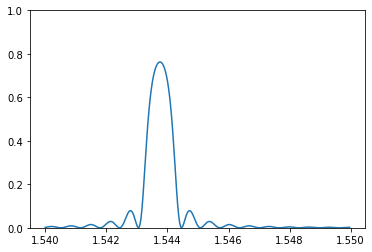

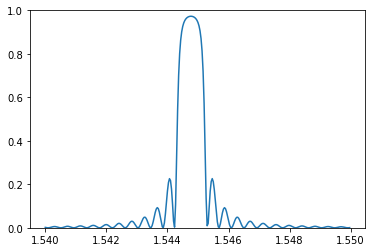

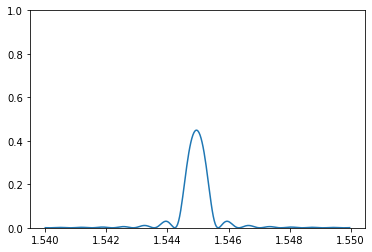

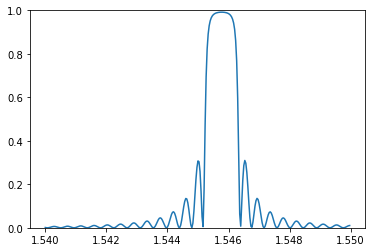

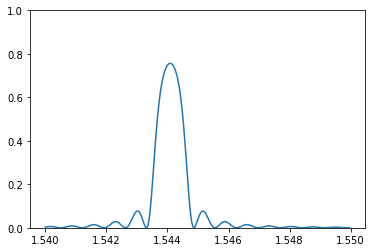

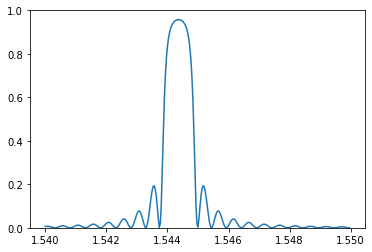

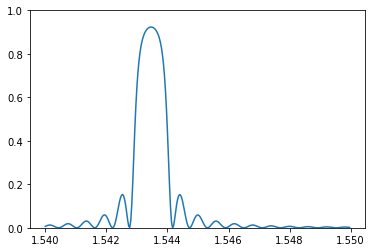

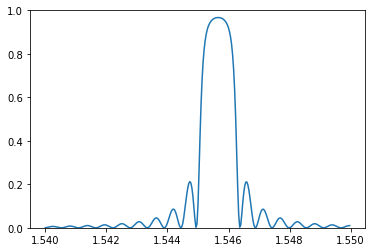

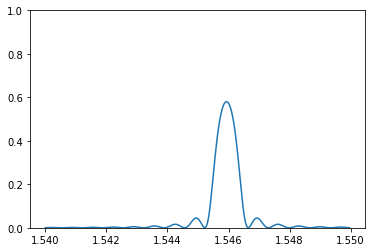

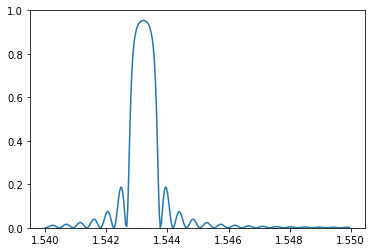

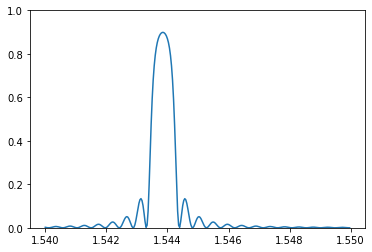

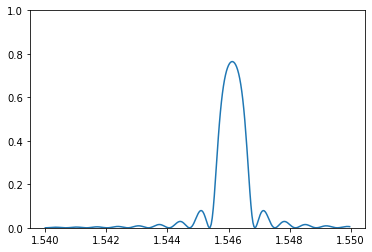

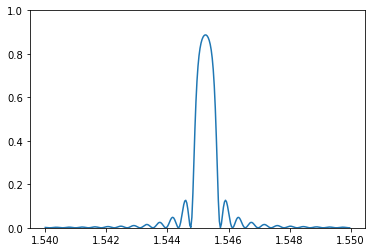

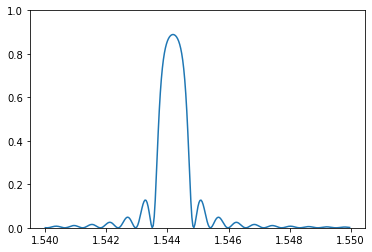

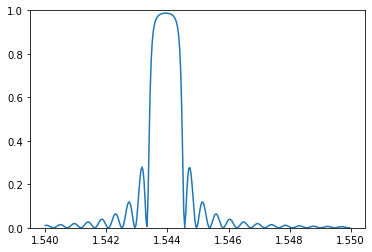

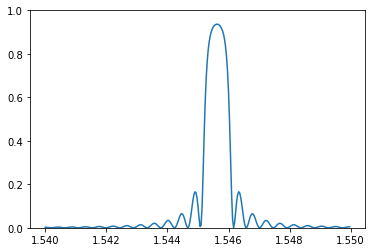

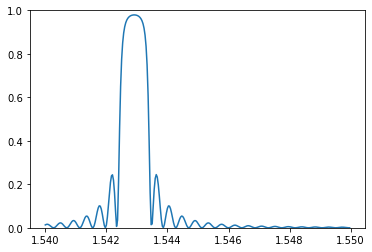

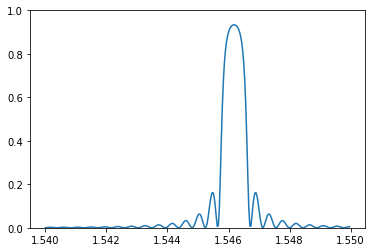

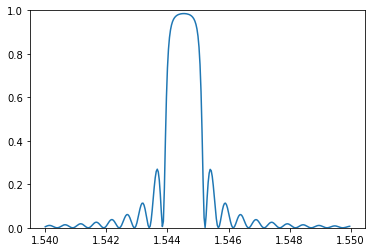

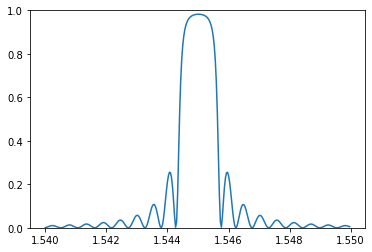

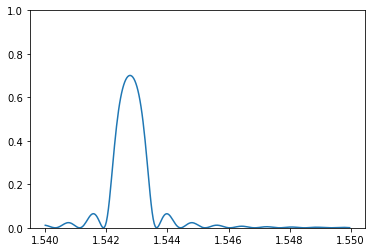

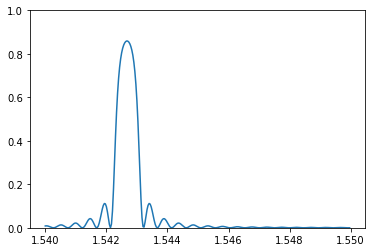

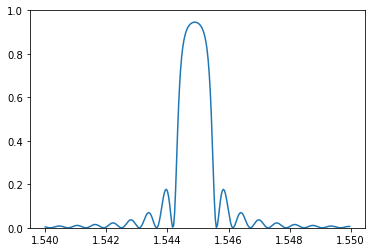

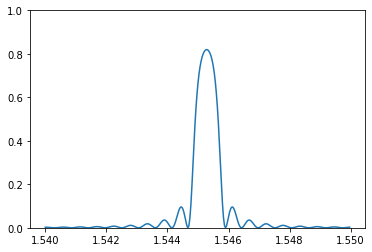

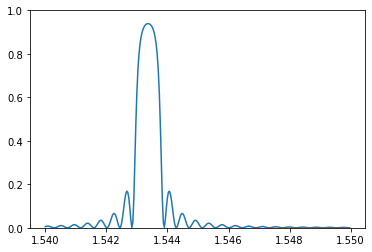

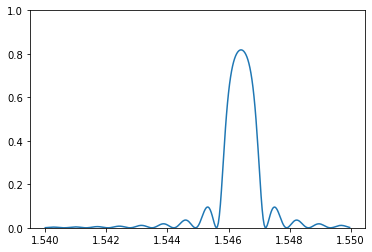

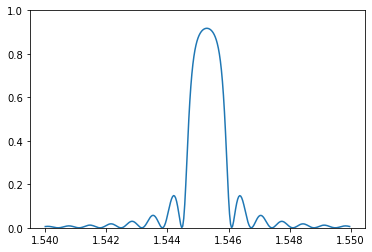

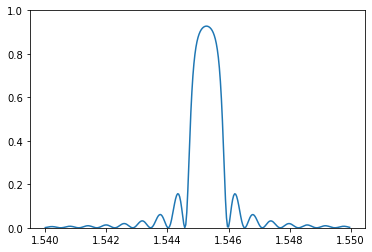

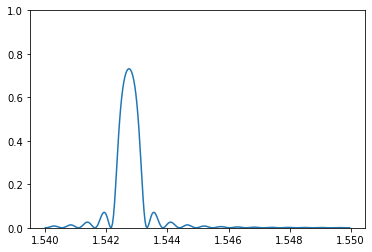

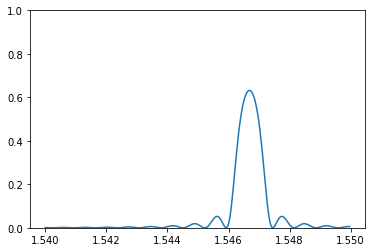

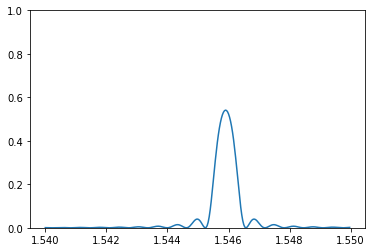

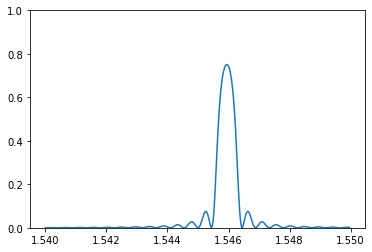

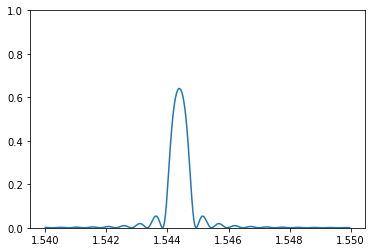

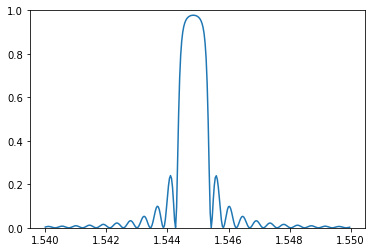

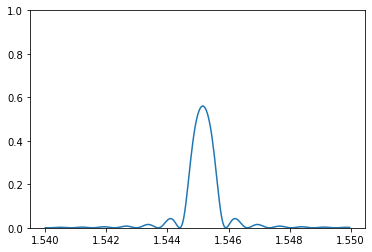

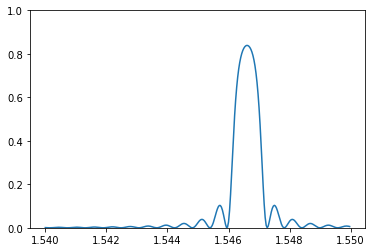

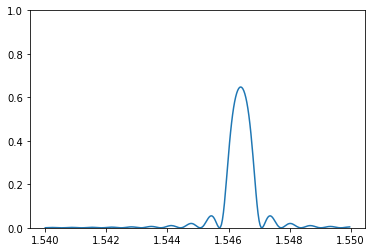

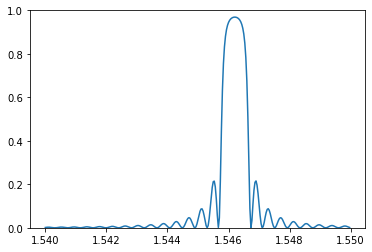

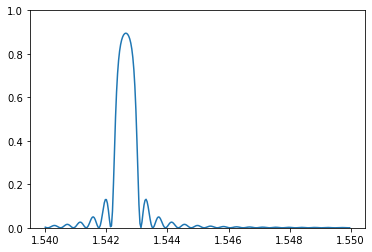

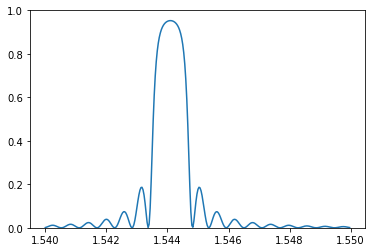

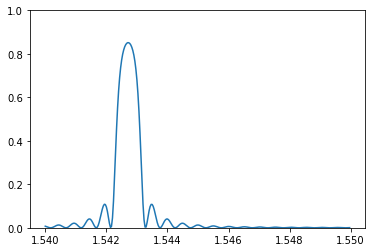

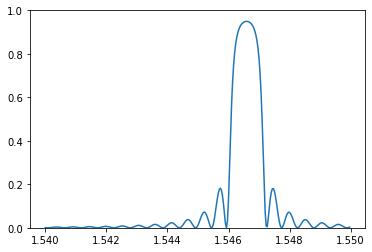

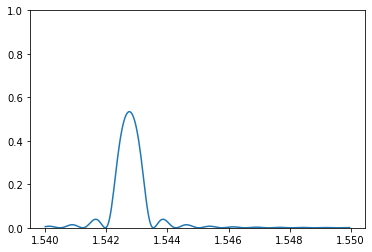

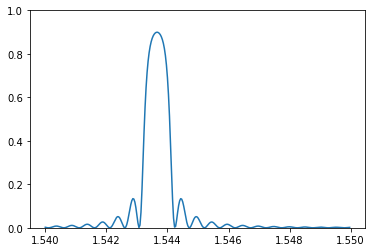

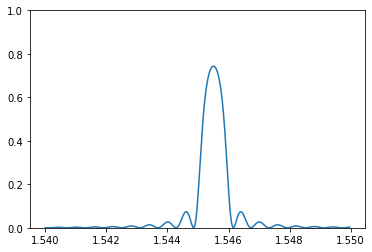

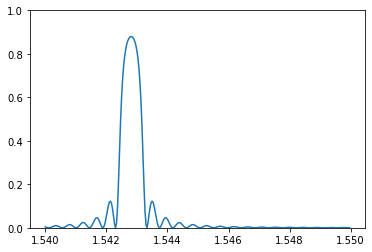

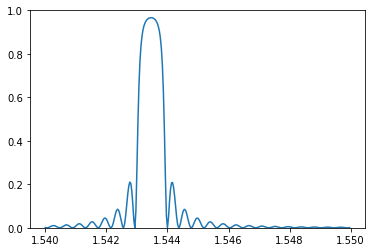

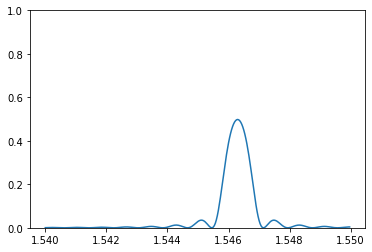

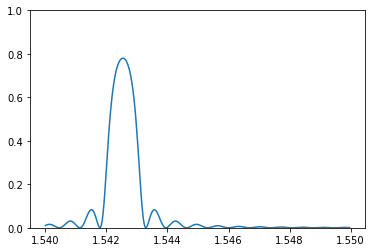

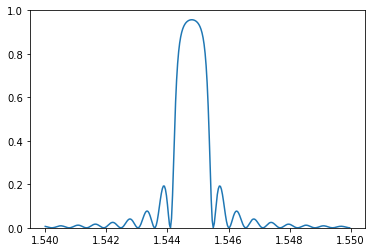

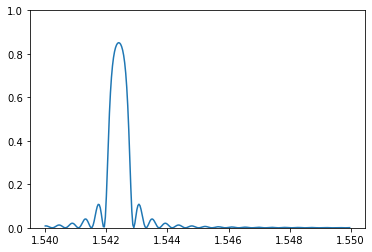

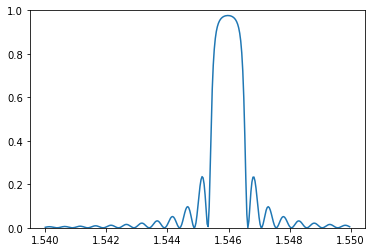

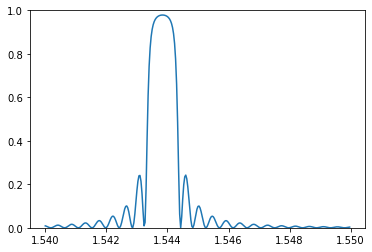

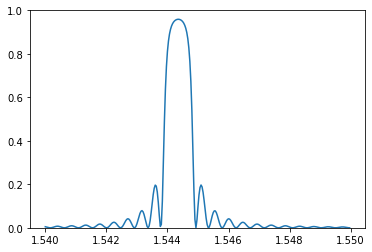

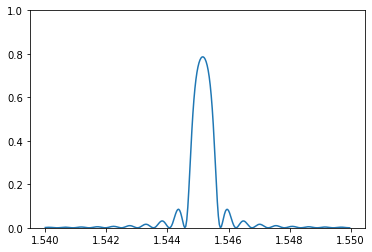

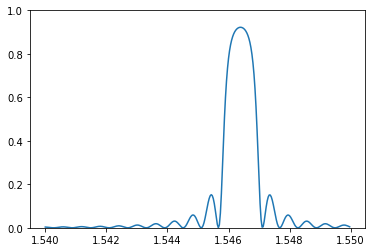

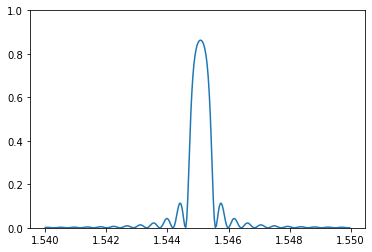

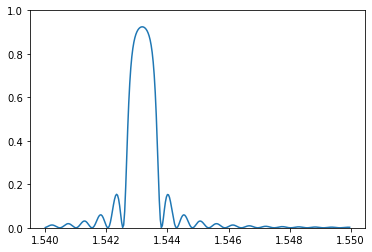

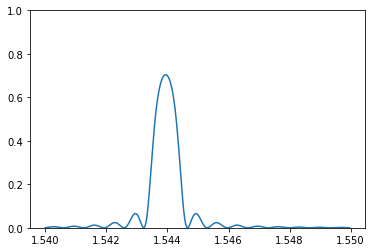

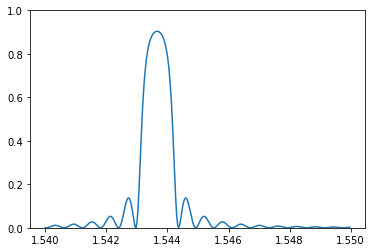

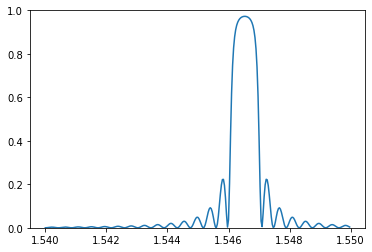

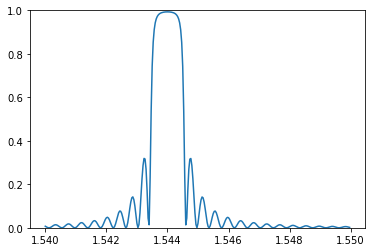

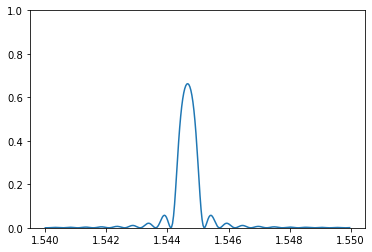

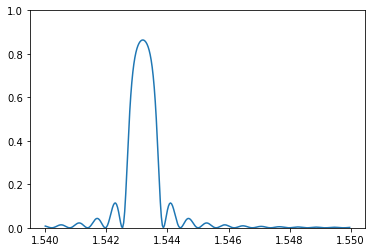

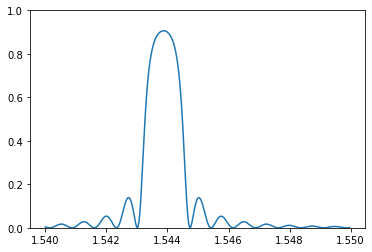

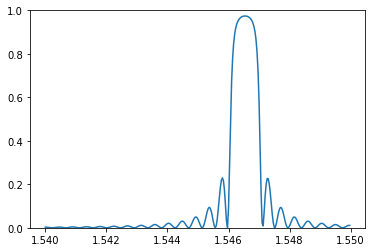

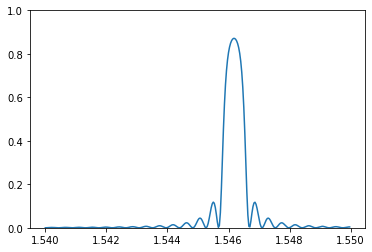

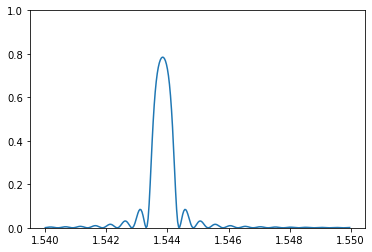

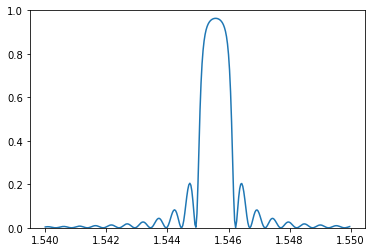

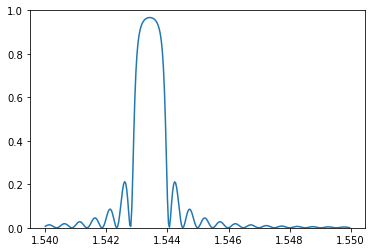

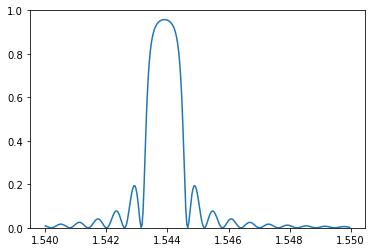

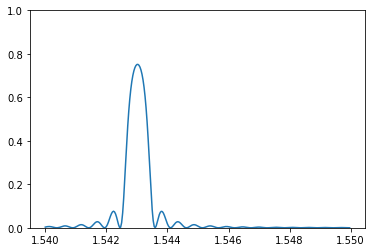

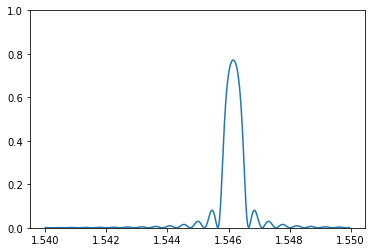

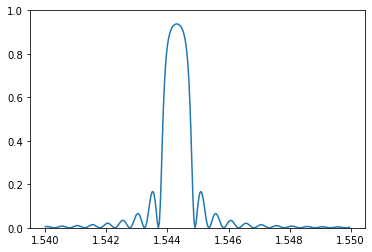

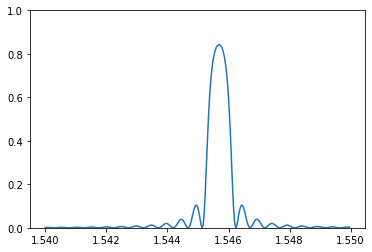

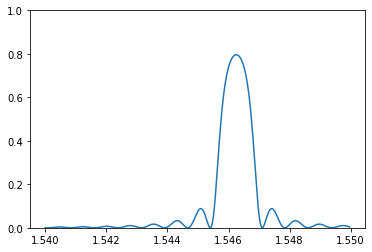

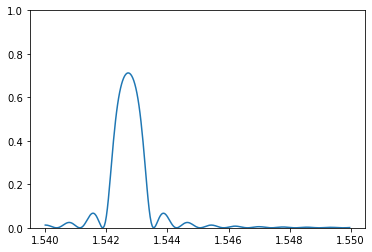

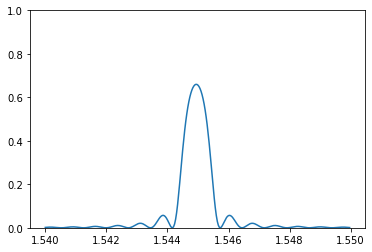

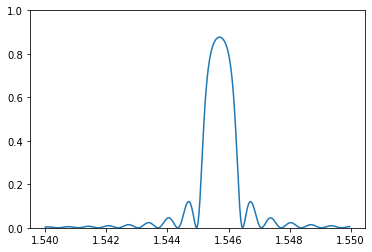

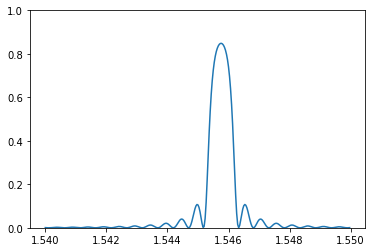

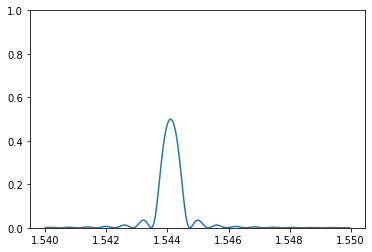

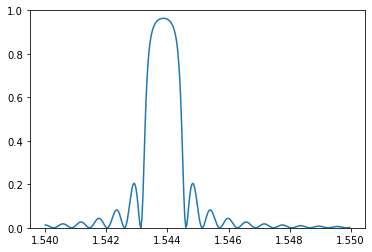

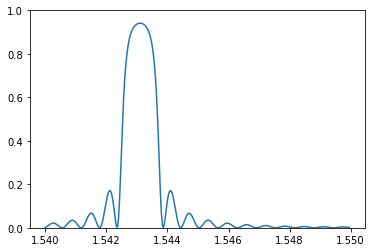

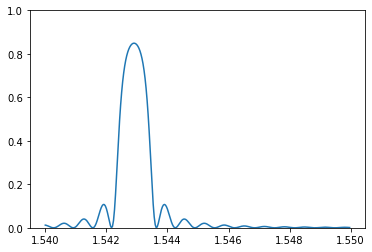

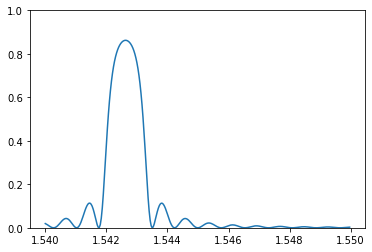

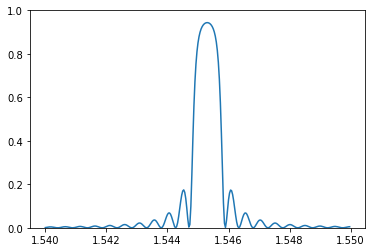

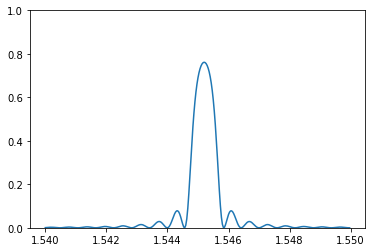

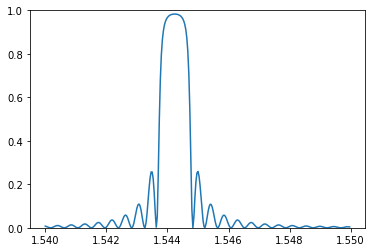

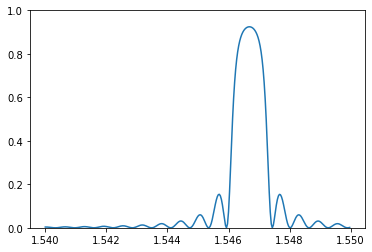

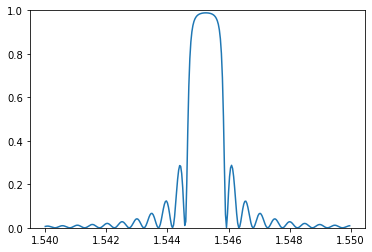

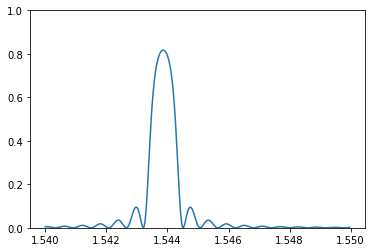

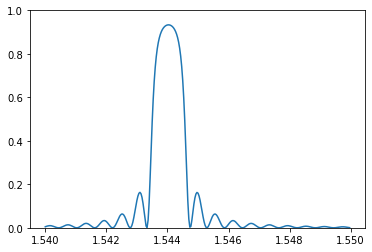

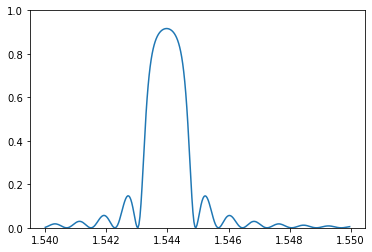

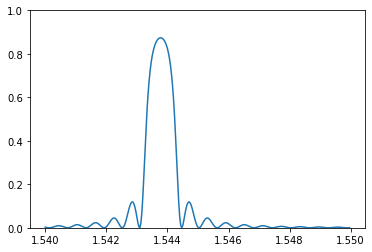

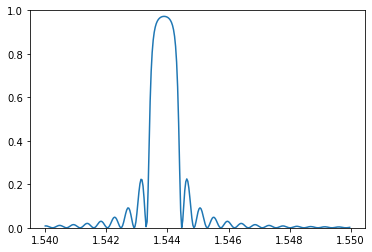

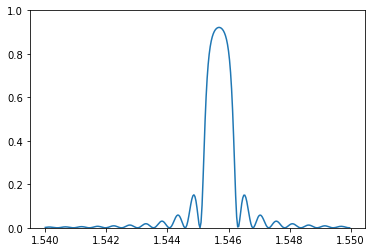

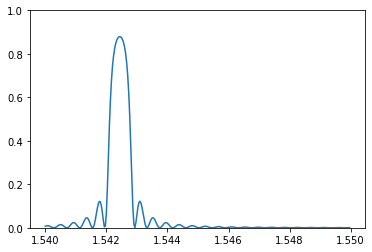

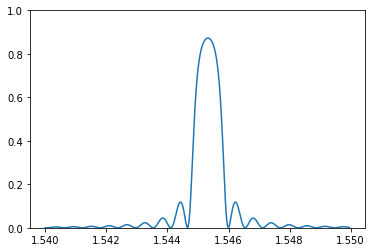

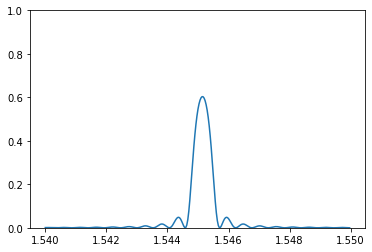

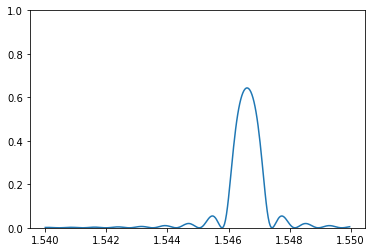

In [125]:
xValues = []
p = 0
d = (xRange.max-xRange.min)/nSamples
for _ in range(nSamples):
    xValues.append(xRange.min+p)
    p += d

for i in range(100):
    plt.figure(i)
    plt.plot(xValues, yTrain[i])
    axes = plt.gca()
    axes.set_ylim([0,1])

(0.0, 1.0)

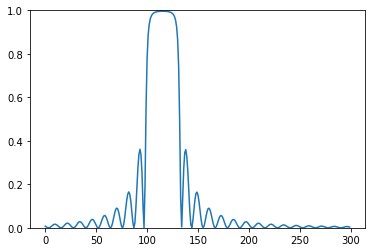

In [85]:
l = 2000
pitch = 0.5355
dn = 0.001
n0 = 1.4415
neta = 0.85
xMin = 1.54
xMax = 1.55
nSamples = 300
_fbg = FBG(nSamples)
_fbg.push(l, pitch, dn, n0, neta)

plt.plot(_fbg.getFunctionSamples(xMin, xMax)[1])
axes = plt.gca()
axes.set_ylim([0,1])